In [361]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab as pl


In [362]:
#Read both the train and test files
train = pd.read_csv('C:/Big Data/Big Mart Project/Train_data.csv')
test = pd.read_csv('C:/Big Data/Big Mart Project/Test_data.csv')

In [363]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [364]:
#To check if number of columns are same in both, as we need to have equal number of columns to concat two datasets
train.columns.equals(test.columns)

False

In [365]:
#To check which features are different
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [366]:
#Add new columns
test['Item_Outlet_Sales'] = 0

In [367]:
#To check if number of columns are same in both, as we need to have equal number of columns to concat two datasets
train.columns.equals(test.columns)

True

In [368]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 12)


In [369]:
#Concat 2 datasets
alldata = pd.concat([train, test], ignore_index=True)

In [370]:
alldata.shape

(14204, 12)

In [371]:
alldata.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0


In [372]:
#Look at the feature names
alldata.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [373]:
#Check datatypes
alldata.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [374]:
#Check null values
alldata.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Item weight null values as per item identifier

In [375]:
alldata['Item_Weight'].fillna('?', inplace = True)

In [376]:
dic = {}
for i in alldata['Item_Identifier']:
    a = (alldata['Item_Identifier']==i)
    b = alldata[a==True]
    c = b['Item_Weight'].unique()
    dic[i] = c

In [377]:
dic

{'FDP01': array([20.75, '?'], dtype=object),
 'FDM09': array([11.15, '?'], dtype=object),
 'FDV47': array([17.1, '?'], dtype=object),
 'FDY38': array([13.6, '?'], dtype=object),
 'FDL50': array([12.15, '?'], dtype=object),
 'FDW24': array(['?', 6.8], dtype=object),
 'FDJ02': array(['?', 17.2], dtype=object),
 'NCK17': array(['?', 11.0], dtype=object),
 'FDY55': array([16.75, '?'], dtype=object),
 'FDI44': array(['?', 16.1], dtype=object),
 'FDY28': array([7.47, '?'], dtype=object),
 'FDZ22': array(['?', 9.395], dtype=object),
 'DRF03': array([19.1, '?'], dtype=object),
 'DRI25': array([19.6, '?'], dtype=object),
 'NCK07': array([10.65, '?'], dtype=object),
 'DRD27': array([18.75, '?'], dtype=object),
 'FDW19': array([12.35, '?'], dtype=object),
 'NCJ31': array([19.2, '?'], dtype=object),
 'FDS46': array([17.6, '?'], dtype=object),
 'FDD17': array([7.5, '?'], dtype=object),
 'FDD58': array([7.76, '?'], dtype=object),
 'FDQ16': array([19.7, '?'], dtype=object),
 'FDC02': array([21.35, '?

In [378]:
weights = {}
for i in dic:
    if len(dic[i])==2:
        if dic[i][0]=='?':
            weights[i]=dic[i][1]
        else:
            weights[i]=dic[i][0]
    if len(dic[i])==1:
        weights[i]=dic[i][0]

In [379]:
weights

{'FDP01': 20.75,
 'FDM09': 11.15,
 'DRC25': 5.73,
 'FDY38': 13.6,
 'FDL50': 12.15,
 'FDW24': 6.8,
 'FDJ02': 17.2,
 'FDR35': 12.5,
 'FDY55': 16.75,
 'FDI44': 16.1,
 'FDY28': 7.47,
 'FDZ22': 9.395,
 'DRI25': 19.6,
 'NCK07': 10.65,
 'FDN60': 15.1,
 'FDW19': 12.35,
 'NCJ31': 19.2,
 'FDS46': 17.6,
 'FDA38': 5.44,
 'FDD58': 7.76,
 'FDQ16': 19.7,
 'FDC02': 21.35,
 'NCM53': 18.75,
 'NCY42': 6.38,
 'FDG60': 20.35,
 'FDX08': 12.85,
 'FDR52': 12.65,
 'FDE51': 5.925,
 'FDH28': 15.85,
 'NCH07': 13.15,
 'FDZ38': 17.6,
 'NCB30': 14.6,
 'FDE36': 5.26,
 'FDZ51': 11.3,
 'FDX28': 6.325,
 'FDJ48': 11.3,
 'FDF50': 4.905,
 'NCT30': 9.1,
 'NCH54': 13.5,
 'NCQ17': 10.3,
 'FDG57': 14.7,
 'FDH40': 11.6,
 'FDY24': 4.88,
 'FDE45': 12.1,
 'FDB05': 5.155,
 'FDR51': 9.035,
 'FDD03': 13.3,
 'DRJ51': 14.1,
 'FDM45': 8.655,
 'NCG07': 12.3,
 'FDP38': 10.1,
 'FDZ25': 15.7,
 'FDB38': 19.5,
 'FDX10': 6.385,
 'FDT57': 15.2,
 'DRD12': 6.96,
 'FDB56': 8.75,
 'FDW25': 5.175,
 'FDQ52': 17.0,
 'NCF31': 9.13,
 'FDR34': 17.0,
 'FD

In [380]:
New_Weights = []
for i in alldata['Item_Identifier']:
    a = weights[i]
    New_Weights.append(a)
    

In [381]:
New_Weights = pd.Series(New_Weights)

In [382]:
New_Weights

0         9.300
1         5.920
2        17.500
3        19.200
4         8.930
5        10.395
6        13.650
7        19.000
8        16.200
9        19.200
10       11.800
11       18.500
12       15.100
13       17.600
14       16.350
15        9.000
16       11.800
17        9.000
18        8.260
19       13.350
20       18.850
21        8.315
22       14.600
23       15.500
24       13.850
25       13.000
26        7.645
27       11.650
28        5.925
29       14.500
          ...  
14174     9.500
14175     6.650
14176     6.760
14177     7.275
14178    15.100
14179     7.405
14180    16.200
14181    15.600
14182     5.000
14183     9.800
14184    16.200
14185     9.800
14186    16.200
14187    13.000
14188    19.600
14189     9.300
14190     9.395
14191    15.600
14192    11.500
14193    10.395
14194    15.000
14195     6.860
14196     7.070
14197    15.700
14198    13.000
14199    10.500
14200     7.600
14201    10.000
14202    15.300
14203     9.500
dtype: float64

In [383]:
alldata.drop('Item_Weight', axis = 1, inplace=True)

In [384]:
alldata.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [385]:
alldata.shape

(14204, 11)

In [386]:
alldata['Item_weight'] = New_Weights

In [387]:
alldata.shape

(14204, 12)

In [388]:
alldata.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_weight
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [389]:
alldata = alldata[['Item_Identifier', 'Item_weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','Item_Outlet_Sales']]

In [390]:
alldata[alldata.Item_Identifier == 'FDI26']

,Item_Identifier,Item_weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
59,FDI26,5.94,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720
2999,FDI26,5.94,Low Fat,0.035084,Canned,176.4344,OUT017,2007,NaN,Tier 2,Supermarket Type1,2141.2128
3624,FDI26,5.94,Low Fat,0.034941,Canned,177.3344,OUT049,1999,Medium,Tier 1,Supermarket Type1,1605.9096
5588,FDI26,5.94,Low Fat,0.034957,Canned,177.1344,OUT045,2002,NaN,Tier 2,Supermarket Type1,2854.9504
6141,FDI26,5.94,Low Fat,0.034880,Canned,177.9344,OUT035,2004,Small,Tier 2,Supermarket Type1,4460.8600
7592,FDI26,5.94,Low Fat,0.034718,Canned,179.4344,OUT027,1985,Medium,Tier 3,Supermarket Type3,6066.7696
7686,FDI26,5.94,Low Fat,0.035029,Canned,179.8344,OUT018,2009,Medium,Tier 3,Supermarket Type2,1249.0408
12175,FDI26,5.94,Low Fat,0.034887,Canned,177.7344,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000
13480,FDI26,5.94,Low Fat,0.034858,Canned,180.4344,OUT013,1987,High,Tier 3,Supermarket Type1,0.0000


# Explore other columns

In [391]:
#Item Fat Content
alldata['Item_Fat_Content'].describe()

count       14204
unique          5
top       Low Fat
freq         8485
Name: Item_Fat_Content, dtype: object

In [392]:
alldata['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [393]:
#Low Fat, low fat, LF are all same and reg, Regular as well. So replace them
alldata['Item_Fat_Content'].replace({'low fat' : 'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace = True)

In [394]:
alldata['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [395]:
# Look at the frequency of each type of item
alldata['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [396]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

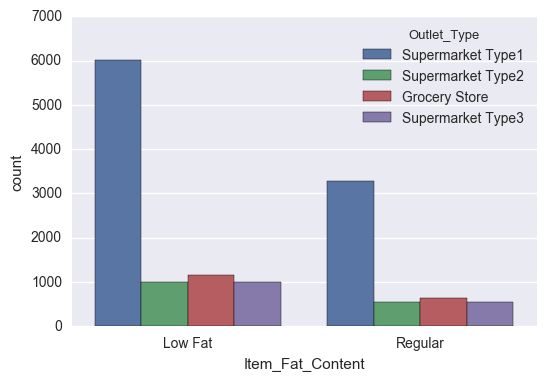

In [397]:
sns.countplot(x = 'Item_Fat_Content', hue = 'Outlet_Type', data=alldata)

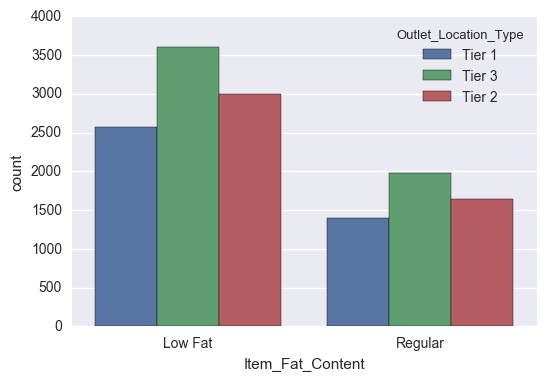

In [398]:
sns.countplot(x = 'Item_Fat_Content', hue = 'Outlet_Location_Type', data=alldata)

# Item Identifier

In [399]:
alldata['Item_Identifier'].describe()

count     14204
unique     1559
top       FDZ23
freq         10
Name: Item_Identifier, dtype: object

# ITEM MRP

In [400]:
# Explore another feature
alldata['Item_MRP'].describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

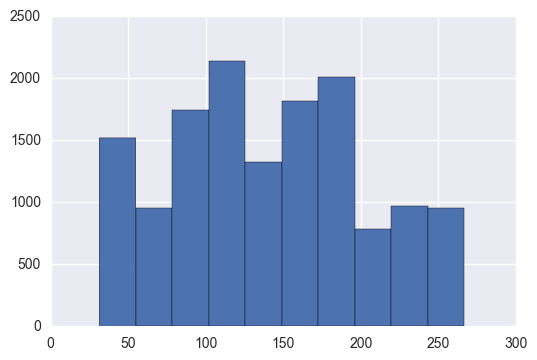

In [401]:
alldata['Item_MRP'].hist()

# Item Type

In [402]:
#Select another feature
alldata['Item_Type'].describe()

count                     14204
unique                       16
top       Fruits and Vegetables
freq                       2013
Name: Item_Type, dtype: object

In [403]:
#See all the unique items that we are selling
alldata['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [404]:
alldata['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

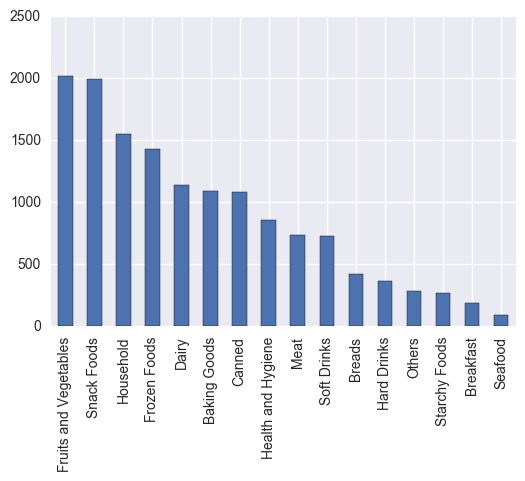

In [405]:
alldata.Item_Type.value_counts().plot(kind='bar')

# Item Visibility

In [406]:
alldata['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [407]:
#To check number of rows where item visibility is 0
(alldata.loc[(alldata['Item_Visibility'] == 0), 'Item_Visibility']).count()

879

In [408]:
alldata.Item_Visibility.mean()

0.06595278007399345

In [409]:
#To find out itemwise mean visibility and impute wrt each item
itemwisemeanvisibility = alldata.groupby('Item_Identifier').Item_Visibility.mean()
itemwisemeanvisibility.head()

Item_Identifier
DRA12    0.034938
DRA24    0.045646
DRA59    0.133384
DRB01    0.079736
DRB13    0.006799
Name: Item_Visibility, dtype: float64

In [410]:
#Find out all rows where visibility = 0
mask = alldata['Item_Visibility']==0
mask.head()

0    False
1    False
2    False
3     True
4     True
Name: Item_Visibility, dtype: bool

In [411]:
#Fill 0's with mean visibility by the same item identifier which is unique
alldata.loc[mask,'Item_Visibility'] = itemwisemeanvisibility[alldata.loc[mask, 'Item_Identifier']].values

In [412]:
#Checking item visibility again
alldata.Item_Visibility.describe()

count    14204.000000
mean         0.069710
std          0.049728
min          0.003575
25%          0.031145
50%          0.057194
75%          0.096930
max          0.328391
Name: Item_Visibility, dtype: float64

# Establishment year

In [413]:
alldata['Outlet_Establishment_Year']

0        1999
1        2009
2        1999
3        1998
4        1987
5        2009
6        1987
7        1985
8        2002
9        2007
10       1999
11       1997
12       1999
13       1997
14       1987
15       1997
16       2009
17       1999
18       1985
19       2004
20       1987
21       1985
22       2004
23       1985
24       1997
25       2007
26       2004
27       1987
28       1998
29       1985
         ... 
14174    1987
14175    2002
14176    2004
14177    1987
14178    1985
14179    1985
14180    1997
14181    1987
14182    1999
14183    1987
14184    1985
14185    2007
14186    2009
14187    2009
14188    1985
14189    1997
14190    1997
14191    1998
14192    1985
14193    2007
14194    1999
14195    1999
14196    2009
14197    1997
14198    1999
14199    1997
14200    2009
14201    2002
14202    2007
14203    2002
Name: Outlet_Establishment_Year, dtype: int64

In [414]:
#Update the age instead of using year of establishment
alldata['Outlet_Establishment_Year'] = 2016 - alldata['Outlet_Establishment_Year']

# Outlet Identifier

In [415]:
#Data looks good, hence no changes required
alldata['Outlet_Identifier'].isnull().sum()

0

In [416]:
alldata['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT046    1550
OUT035    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

# Outlet location type

In [417]:
#This data as well looks good and hence no need to change
alldata['Outlet_Location_Type'].head()

0    Tier 1
1    Tier 3
2    Tier 1
3    Tier 3
4    Tier 3
Name: Outlet_Location_Type, dtype: object

# Imputing Outlet size feature

In [418]:
#Check number of null values
alldata['Outlet_Size'].isnull().sum()

4016

In [419]:
#Check unique count
alldata['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [420]:
#Check frequency of each type of outlet size
alldata['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [421]:
alldata.groupby('Outlet_Size').Outlet_Type.value_counts()

Outlet_Size  Outlet_Type      
High         Supermarket Type1    1553
Medium       Supermarket Type3    1559
             Supermarket Type1    1550
             Supermarket Type2    1546
Small        Supermarket Type1    3100
             Grocery Store         880
Name: Outlet_Type, dtype: int64

In [422]:
pd.crosstab(alldata['Outlet_Size'], alldata['Outlet_Type'],dropna=False, margins=True)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,All
Outlet_Size,,,,,
High,0,1553,0,0,1553
Medium,0,1550,1546,1559,4655
Small,880,3100,0,0,3980
All,1805,9294,1546,1559,14204


In [423]:
#Impute oulet size with small, where ever outlet type is grocery store
alldata.loc[alldata['Outlet_Type']=='Grocery Store', 'Outlet_Size'] = 'Small'

In [424]:
#To check if the above code has been executed successfully
pd.crosstab(alldata['Outlet_Size'], alldata['Outlet_Type'],dropna=False, margins=True)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,All
Outlet_Size,,,,,
High,0,1553,0,0,1553
Medium,0,1550,1546,1559,4655
Small,1805,3100,0,0,4905
All,1805,9294,1546,1559,14204


In [425]:
#To check against outlet location type
pd.crosstab(alldata['Outlet_Size'], alldata['Outlet_Location_Type'],dropna=False, margins=True)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3,All
Outlet_Size,,,,
High,0,0,1553,1553
Medium,1550,0,3105,4655
Small,2430,1550,925,4905
All,3980,4641,5583,14204


In [426]:
#Tier 2 has only small outlet size, hence we can assume it will have only small size
alldata.loc[alldata['Outlet_Location_Type']=='Tier 2', 'Outlet_Size'] = 'Small'

In [427]:
#Hence all the null values have been imputed
alldata.Outlet_Size.isnull().sum()

0

In [428]:
alldata['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [429]:
alldata.tail()

,Item_Identifier,Item_weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,19,Small,Tier 1,Supermarket Type1,0.0
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,7,Medium,Tier 3,Supermarket Type2,0.0
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,14,Small,Tier 2,Supermarket Type1,0.0
14202,FDJ26,15.3,Regular,0.088380,Canned,214.6218,OUT017,9,Small,Tier 2,Supermarket Type1,0.0
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,14,Small,Tier 2,Supermarket Type1,0.0


# Outlet Type

In [430]:
alldata['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [431]:
#As there are no null values, this feature seems good to be used

# Building Model

In [465]:
traindata = alldata.loc[alldata['Item_Outlet_Sales']!=0].copy()
testdata = alldata.loc[alldata['Item_Outlet_Sales']==0].copy()

In [466]:
print(traindata.shape)
print(testdata.shape)

(8523, 12)
(5681, 12)


In [467]:
#Create a new column called item_sold instead of item outlet sales
Item_Sold = round(traindata['Item_Outlet_Sales']/traindata['Item_MRP'])
traindata['Item_Sold'] = Item_Sold
testdata['Item_Sold'] = 0

In [468]:
print(traindata.shape)
print(testdata.shape)

(8523, 13)
(5681, 13)


In [469]:
#We can now delete item outlet sales column
del traindata['Item_Outlet_Sales']
del testdata['Item_Outlet_Sales']

In [470]:
print(traindata.shape)
print(testdata.shape)

(8523, 12)
(5681, 12)


In [471]:
#Item Identifier is not going to be important feature for my calculation, hence i drop it
del traindata['Item_Identifier']
del testdata['Item_Identifier']

In [472]:
print(traindata.shape)
print(testdata.shape)

(8523, 11)
(5681, 11)


In [473]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

In [474]:
traindata.columns

Index(['Item_weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Sold'],
      dtype='object')

In [475]:
#Splitting the training data in dependent and independent variables
xtr = traindata[['Item_weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type','Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]
ytr = traindata['Item_Sold']

In [476]:
#Splitting the test data in dependent and independent variables
xte = testdata[['Item_weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type','Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

In [477]:
#Get dummy variables
final_train = pd.get_dummies(xtr)
final_test = pd.get_dummies(xte)

In [478]:
print(final_train.shape)
print(final_test.shape)

(8523, 42)
(5681, 42)


In [479]:
#Crossvalidation
x_train, x_test, y_train, y_test = train_test_split(final_train,ytr, test_size = 0.3, random_state = 101)

In [480]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [481]:
print(lm.intercept_)

11.8815950394


In [482]:
print(lm.coef_)

[  2.39765786e-03  -5.47908354e-01   1.35050906e-03   1.17109575e-01
  -1.04412687e-01   1.04412687e-01  -2.86746293e-01   5.82695485e-01
  -1.11305269e-01   1.58186553e-01  -5.45784322e-01  -6.38211353e-01
   8.47625765e-03  -4.36358891e-01   9.20192394e-02  -2.49933887e-01
   3.39088737e-01   1.42592375e-01   1.20454802e+00  -2.30917051e-02
  -2.78126646e-01   4.19517001e-02  -3.12142650e+00  -7.72940968e-01
   1.22052317e+00  -6.55178539e-01  -3.26568916e+00   4.29043519e+00
   1.19697205e+00  -6.22607804e-01   2.74841010e+00  -1.01849754e+00
  -7.72940968e-01   2.61675911e+00  -1.84381814e+00  -1.53577660e+00
   1.79488742e+00  -2.59110823e-01  -6.38711566e+00   2.75185902e+00
  -6.55178539e-01   4.29043519e+00]


In [483]:
coeff_df = pd.DataFrame(lm.coef_, xdummy.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Item_weight,0.002398
Item_Visibility,-0.547908
Item_MRP,0.001351
Outlet_Establishment_Year,0.117110
Item_Fat_Content_Low Fat,-0.104413
Item_Fat_Content_Regular,0.104413
Item_Type_Baking Goods,-0.286746
Item_Type_Breads,0.582695
Item_Type_Breakfast,-0.111305
Item_Type_Canned,0.158187


In [487]:
predictions = lm.predict(x_test)

In [494]:
Item_Outlet_Sales = pd.Series(predictions)

In [495]:
Final_result = test.Item_MRP * Item_Outlet_Sales

In [ ]:
test['Item_Outlet_Sales'] = Item_Outlet_Sales * testdata['Item_MRP']

In [488]:
from sklearn import metrics

In [489]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MSE: 46.9143314178
RMSE: 6.84940372717


# Submission

In [496]:
Submission = pd.DataFrame({'Item_Identifier': test.Item_Identifier, 'Outlet_Identifier': test.Outlet_Identifier, 'Item_Outlet_Sales': Final_result})

In [498]:
Submission.head()

,Item_Identifier,Item_Outlet_Sales,Outlet_Identifier
0,FDW58,1495.823746,OUT049
1,FDW14,1425.031008,OUT017
2,NCN55,4109.046077,OUT010
3,FDQ58,2610.743862,OUT017
4,FDY38,3716.046715,OUT027


In [499]:
cols = ['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']

In [502]:
Submission = Submission[cols]
Submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1495.823746
1,FDW14,OUT017,1425.031008
2,NCN55,OUT010,4109.046077
3,FDQ58,OUT017,2610.743862
4,FDY38,OUT027,3716.046715


In [504]:
Submission.to_csv("Sales_Prediction_submission_revised.csv", index=False)